[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI342-F1/Lab-Tutoral/blob/main/AI342Lab1.ipynb)

lab1 solution
name : Rose Alamri
SID : 4452448

# Lab 1: Introduction to Digital Images and Image Processing with Python
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS
---
### Learning Objectives:
* Represent a digital image as a numerical array.
* Understand pixels, spatial resolution, and grey level intensity.
* Load, display, and inspect images in Python.
* Apply simple low-level image processing operations.
* Relate practical operations to the image processing pipeline introduced in Chapter 1

## 1. Environment Setup

In [221]:
# write your code here

import numpy as np
import matplotlib.pyplot as plt


## 2. What is a digital image in practice?
In the lecture, a digital image is defined as a two dimensional function $f(x,y)$ where the value at each coordinate represents intensity. In practice, this function is stored as a matrix of numbers.

##**Exercise 2.1: Create a synthetic image**


In [222]:
# Task: Create an 8x8 black image (matrix of zeros)
# Hint: Use np.zeros((rows, cols))
image = np.zeros((8, 8))
print(image)

# --- Discussion Questions ---
# 1. What is the spatial resolution of this image? a : 8,8
# 2. What does each value represent? a : intencity level for pixel

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


##**Exercise 2.2: Visualise the image**

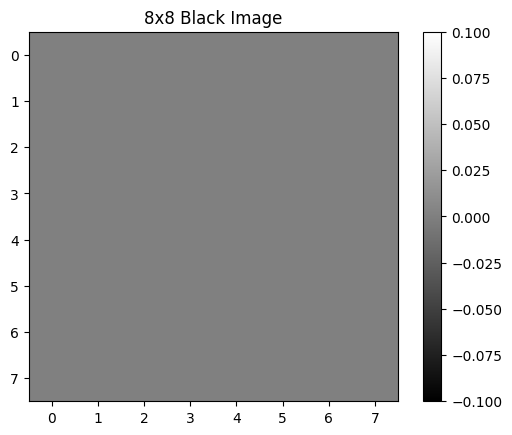

In [223]:
# write your code here
plt.imshow(image, cmap='gray')
plt.title("8x8 Black Image")
plt.colorbar()
plt.show()
# Task: Change some pixels to 255 (White) and re-visualize
# image[row, col] = 255
# WRITE YOUR CODE HERE:

## 3. Pixels and intensity values
Pixels are the smallest units of a digital image and hold quantised intensity values, as discussed in the slides on pixels and digitisation
## **Exercise 3.1: Modify individual pixels**


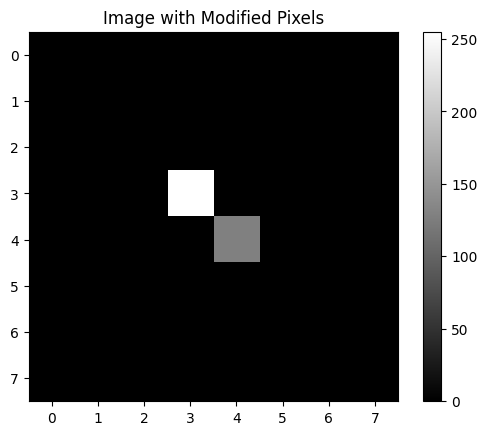

In [224]:
# write your code here
image[3, 3] = 255
image[4, 4] = 128

plt.imshow(image, cmap='gray')
plt.title("Image with Modified Pixels")
plt.colorbar()
plt.show()

#Questions
#1.	Which pixel is brighter and why? 4,4 , 255 maximum value
#2.	How does quantisation affect visual appearance?


## 4. Grey scale images
The course focuses primarily on grey scale images with one sample per pixel.
## **Exercise 4.1: Generate a gradient image**


[[255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]
 ...
 [255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]]


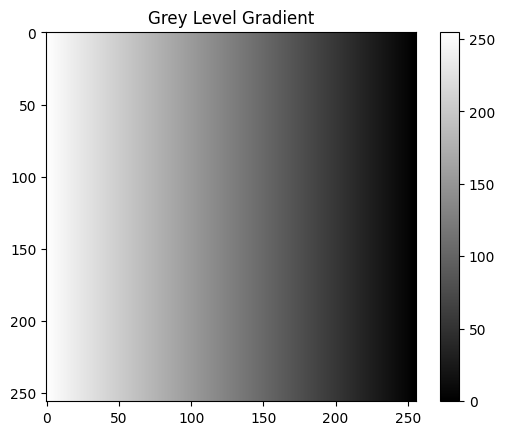

float64


In [225]:
# write your code here
gradient = np.tile(np.linspace(255, 0, 256), (256, 1))
# np.linspace(0, 255, 256) , from 0 to 256 space is 1 since there are 256 many values
# (256, 1)) repeeates the row vector 256 rows and 1 colunls (no reapeate column *1)
print(gradient)
plt.imshow(gradient, cmap='gray')
plt.title("Grey Level Gradient")
plt.colorbar()
plt.show()
print(gradient.dtype )
# gradaint here means vairable in a function
#Questions
#1.	How many grey levels are visible?
#2.	What data type is used to store the pixel values?


## 5. Image acquisition and representation
Image acquisition converts a physical scene into a digital image. In Python, loading an image is equivalent to acquiring an already digitised scene.
## **Exercise 5.1: Load and inspect an image**

(151, 227, 4)
float32


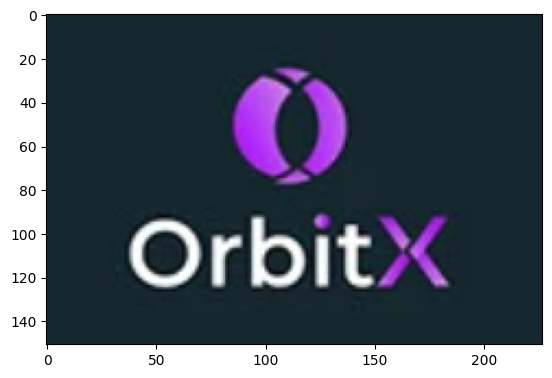

In [226]:
# write your code here
from matplotlib.image import imread

image = imread('/content/Screenshot 2025-10-04 174733.png')
# imread('https://upload.wikimedia.org/wikipedia/commons/2/24/Lenna.png')
print(image.shape)
print(image.dtype)
plt.imshow(image)



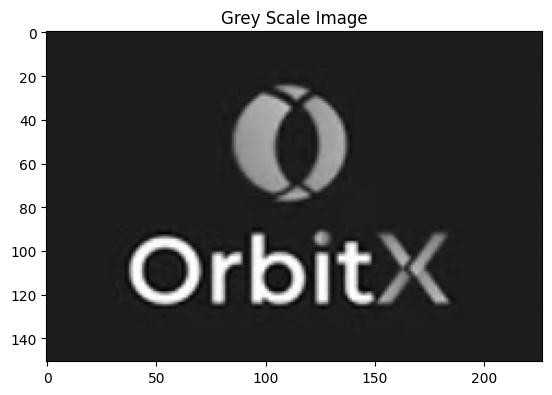

In [227]:
#task
gray = image.mean(axis=2)
 # axis=2
 # axis of pixeles values (151, 227, 4)
plt.imshow(gray, cmap='gray')
plt.title("Grey Scale Image")
plt.show()

## 6. Low level image processing: image in, image out
Low level processing improves visual quality without extracting semantic meaning, as described in the lecture pipeline
## **Exercise 6.1: Image enhancement by contrast stretching**

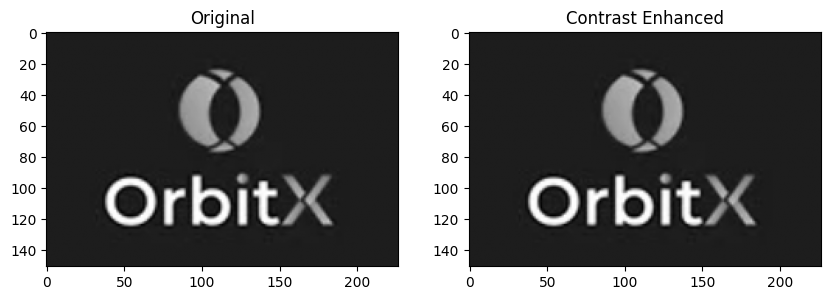

In [228]:
# write your code here
min_val = gray.min()
max_val = gray.max()
# الغامق يغمق اكثر والفاتح يفتح اكثر

enhanced = (gray - min_val) / (max_val - min_val) * 255

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(enhanced, cmap='gray')

plt.title("Contrast Enhanced")
plt.show()

#Questions
#1.	Which image has better visibility of details?
#2.	Is this enhancement subjective or objective?


## 7. Noise and image restoration
Noise removal is a core example of low level processing.

## **Exercise 7.1: Add artificial noise**

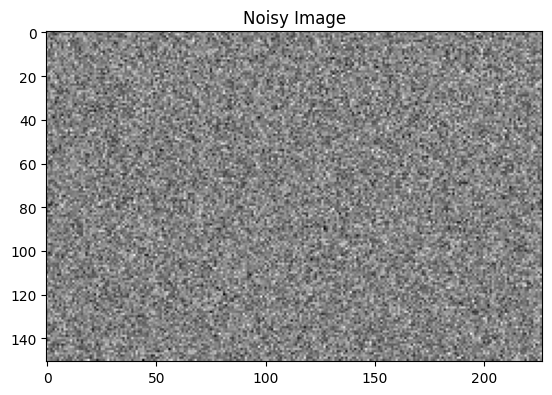

In [229]:
# write your code here
noise = np.random.normal(0, 20, gray.shape)
noisy = gray + noise

plt.imshow(noisy, cmap='gray')
plt.title("Noisy Image")
plt.show()

# 0 is mean
# 20 is vairance تباين الارقام عن بعض

## **Exercise 7.2: Simple smoothing filter**

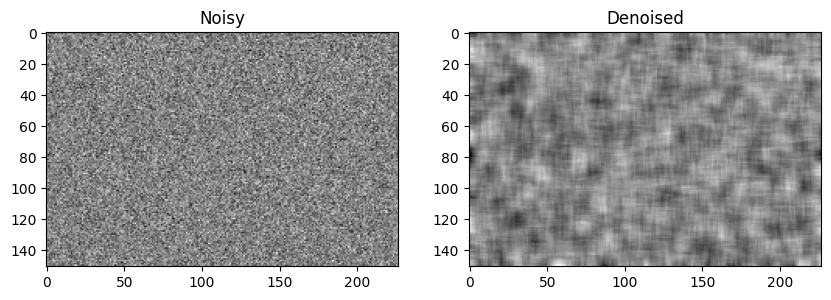

In [230]:
def mean_filter(img, k=10):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

denoised = mean_filter(noisy)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy")

plt.subplot(1,2,2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised")
plt.show()

# كل ما قللنا الكيرنال كان ياخذ من حوالينه ياخذ من الجيران الاقرب ال k  هي الكيرنال اللي قللناها ناخذ من خلايا المحيط الاصغر

## 8. From image processing to image analysis
The lecture distinguishes between low, mid, and high level processing.
## **Exercise 8.1: Simple threshold segmentation**

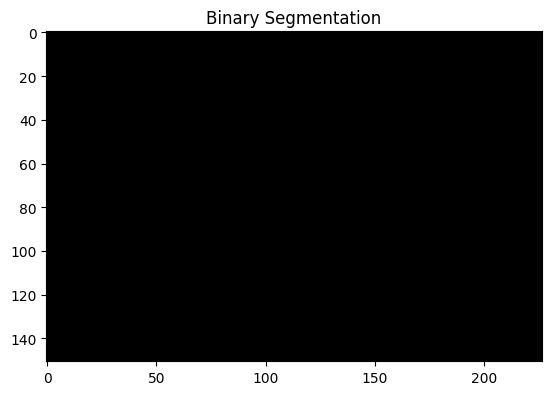

In [231]:
## write your code here
threshold = gray.mean()+40
binary = gray > threshold

plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation")
plt.show()

# Discussion:
# 1. Is this segmentation reliable?
# 2. What information is lost when converting to binary?

#**9. Mini project: connecting theory to practice**

**Task**

Using only NumPy and Matplotlib:

1.	Create a synthetic image containing at least two objects

2.	Add noise to the image

3.	Apply enhancement and denoising

4.	Segment the objects using a threshold

**Deliverables**

•	Code

•	Output images

•	Short explanation mapping each step to the image processing stages shown in the Chapter 1 pipeline diagram


***Note: Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots***

Task 1 : Create a synthetic image containing at least two objects

(1) Image Acquisition
Instead of capturing a real image with a camera, a synthetic 64×64 image was generated using a NumPy matrix. This represents the acquisition stage because it produces the initial raw image that will be processed.

image od 64x64 matrix of zeros 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Visualise the image 



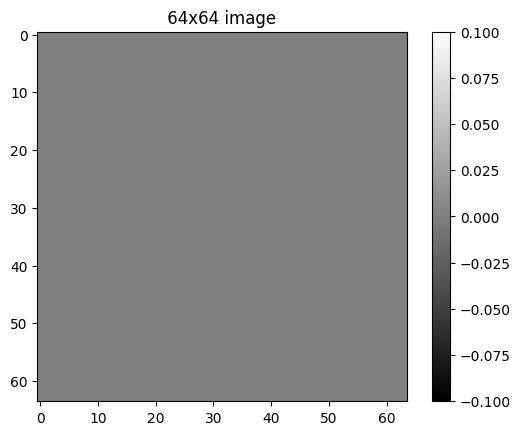

image with two objects 


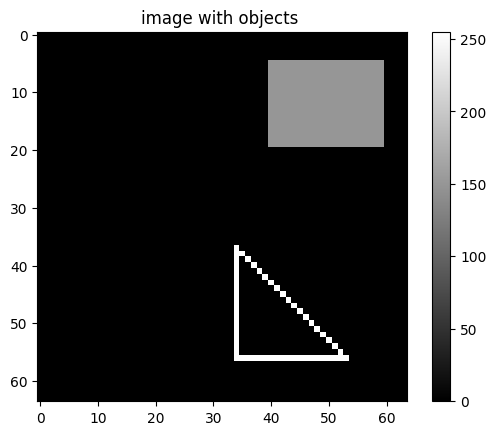

In [232]:
# imports

import numpy as np
import matplotlib.pyplot as plt

# create matrix -that is the image- of zeros with spatial resolution of 64x64

image_1 = np.zeros((64,64))
print("image od 64x64 matrix of zeros \n")
print(image_1)

# Visualise the image
print("Visualise the image \n")
plt.imshow(image_1,cmap = 'grey')
plt.title(" 64x64 image ")
plt.colorbar() # this line is what makes colors vairy
plt.show()

# add two objects to the image
print("image with two objects ")

# first object : squair
for i in range(40,60):
  for j in range(5,20):
     image_1 [j,i]= 150

# second object Pythagorean triangle shape
# straight standing line
for i in range (38,56):
   image_1 [i,34]= 255

# horizintal line
for i in range (34,54):
  image_1 [56,i]= 255
# making diagonal line
x= 36
y=33
for i in range(33,52):
  b = 1
  x= x+b
  y= y +b
  image_1[x,y]= 255
  b=b+1



plt.imshow(image_1,cmap= 'grey')
plt.title('image with objects ')
plt.colorbar()
plt.show()

task 2 : Add noise to the image

(2) Image Preprocessing
Gaussian (normal) noise is added to the image . This step is preprocessing it's important for coming enhancement .

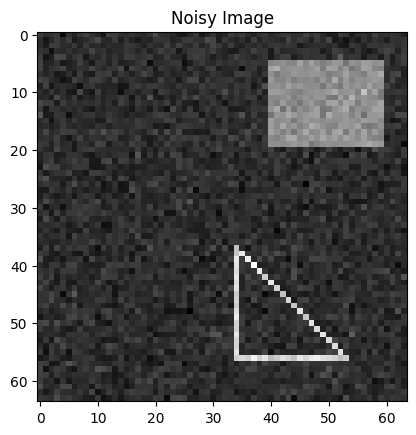

In [233]:
noise_1 = np.random.normal(0, 20, image_1.shape)
noisy_1 = image_1 + noise_1

plt.imshow(noisy_1, cmap='grey')
plt.title("Noisy Image")
plt.show()

task 3: Apply enhancement and denoising

(3_a) Image Enhancement
Contrast stretching is applied to improve the visibility of the objects in the noisy image. This increases the clarity and contrast of important features.
(3_b) Image Restoration (Denoising)
A mean filter is used to reduce the noise . This step represents restoration because it attempts to recover a cleaner version of the original image by smoothing out noise.

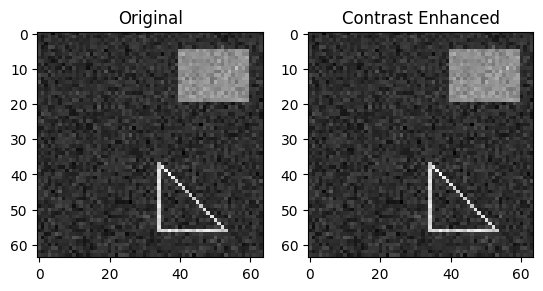

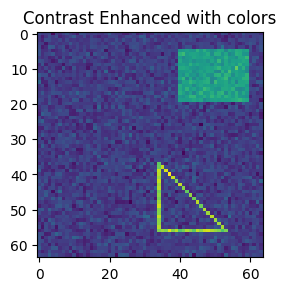

In [234]:
# Image enhancement by contrast stretching
min_val = noisy_1.min()
max_val = noisy_1.max()

enhanced = (noisy_1 - min_val) / (max_val - min_val) * 255

#plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy_1, cmap='grey')
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(enhanced , cmap='grey')

plt.title("Contrast Enhanced")
plt.show()

plt.subplot(1,2,1)
plt.imshow(enhanced)

plt.title("Contrast Enhanced with colors")
plt.show()

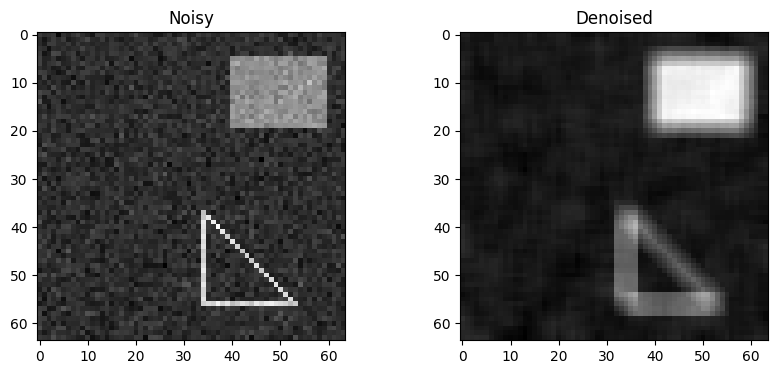

In [235]:
#Simple smoothing filter

def mean_filter(img, k=5):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

denoised_1 = mean_filter(noisy_1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy_1, cmap='gray')
plt.title("Noisy")

plt.subplot(1,2,2)
plt.imshow(denoised_1, cmap='gray')
plt.title("Denoised")
plt.show()

task 4 : Segment the objects using a threshold
 image analysis

(4) Image Segmentation
Thresholding was applied to separate the objects from the background. the segmentation stage divides the image into meaningful regions (foreground objects vs. background).

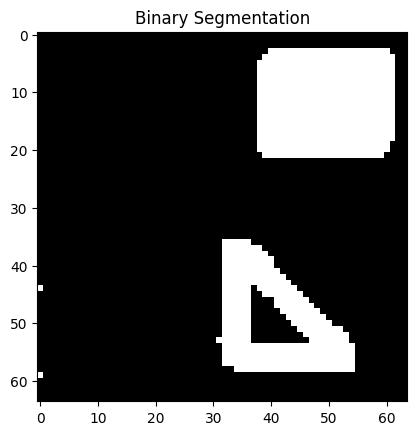

In [236]:
threshold = denoised_1.mean()
binary = denoised_1 > threshold

plt.imshow(binary, cmap='grey')
plt.title("Binary Segmentation")
plt.show()

10- Reflection questions


1. Where does image processing end and image analysis begin in your mini project?


A: Image processing ends after the steps that modify or improve the image itself; creating the synthetic image, adding noise, enhancing contrast, and applying the mean filter.
Image analysis begins at the segmentation stage, where the goal shifts from improving the image to extracting meaningful information from it (identifying and isolating the objects).
in short, image processing ends at denoising, and image analysis begins at threshold‑based segmentation.

2. Which steps correspond to low level processing only?

A: Low level processing includes operations that work directly on pixel values without interpreting the content of the image.
the low level steps here are:

1-Creating the synthetic image

2-Adding noise

3-Contrast stretching (enhancement)

4-Mean filtering (denoising)

These steps modify pixel intensities but do not attempt to understand or interpret the objects in the image.

3. Why is digitisation always an approximation of reality?


A: Digitisation converts a continuous real world scene into a discrete grid of pixels with limited resolution and limited intensity levels.
Because both space (pixels) and brightness (quantization levels) are sampled at fixed intervals, fine details and subtle variations are always lost.
For this reason, a digital image can never capture reality perfectly  it is always an approximation based on sampling and quantization.